#  Análise Histórica de Faturamento – O//QUARTO Records
Este notebook analisa o crescimento do faturamento da gravadora O//QUARTO Records desde o primeiro registro disponível (Set/2020) até Janeiro de 2025, utilizando Python, NumPy e Matplotlib.

In [1]:
#  Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Leitura do arquivo CSV
df = pd.read_csv('Análise_produção BI - DADO BRUTO.csv')

In [3]:
#  Limpeza dos dados
df_clean = df.copy()
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed')]
df_clean['Data início'] = pd.to_datetime(df_clean['Data início'], errors='coerce', dayfirst=True)
df_clean = df_clean.dropna(subset=['Data início'])
df_clean['Valor'] = pd.to_numeric(df_clean['Valor'], errors='coerce')
df_clean = df_clean.dropna(subset=['Valor'])

##  Filtro: Desde o primeiro registro até Janeiro/2025

In [4]:
inicio = df_clean['Data início'].min()
fim = pd.to_datetime('2025-01-31')
df_hist = df_clean[(df_clean['Data início'] >= inicio) & (df_clean['Data início'] <= fim)]
df_hist['AnoMes'] = df_hist['Data início'].dt.to_period('M')

/tmp/ipython-input-4-2362230219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist['AnoMes'] = df_hist['Data início'].dt.to_period('M')


In [5]:
#  Faturamento mensal histórico com NumPy
faturamento_mensal = df_hist.groupby('AnoMes')['Valor'].sum().reset_index()
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)
valores = faturamento_mensal['Valor'].values
labels = faturamento_mensal['AnoMes'].values

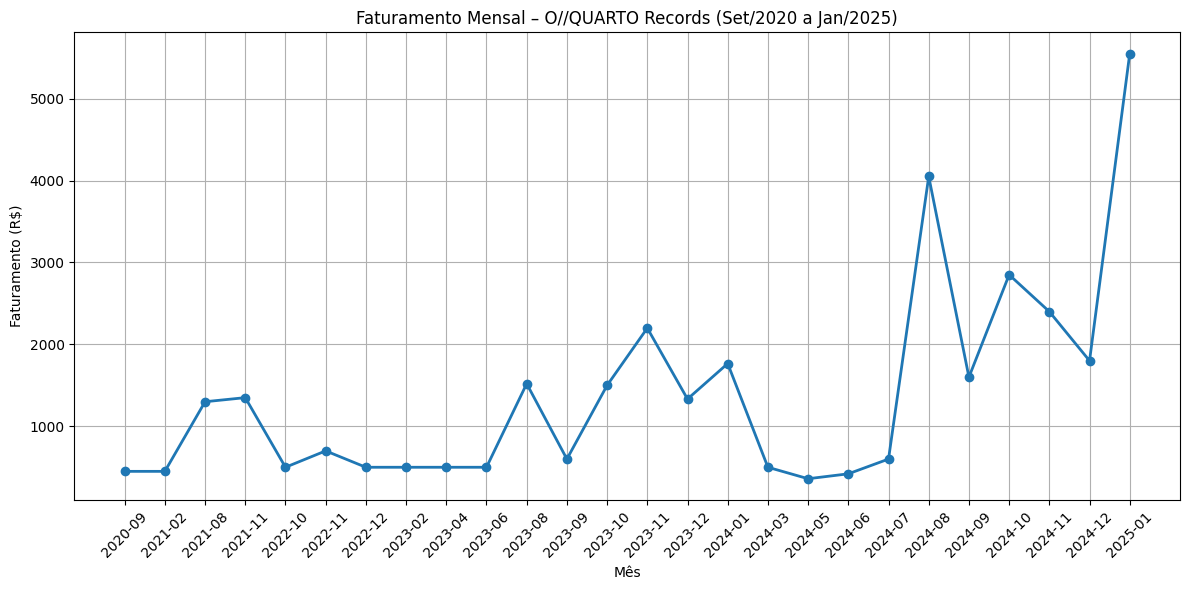

In [6]:
#  Gráfico de evolução histórica com Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(labels, valores, marker='o', linestyle='-', linewidth=2)
plt.title('Faturamento Mensal – O//QUARTO Records (Set/2020 a Jan/2025)')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Valores já ordenados por mês
faturamento_inicio = valores[0]
faturamento_final = valores[np.where(labels == '2025-01')[0][0]]

# Número de meses entre o primeiro e o último ponto
num_meses = len(valores) - 1

# Cálculo da taxa média de crescimento mensal (CAGR)
cagr_mensal = ((faturamento_final / faturamento_inicio) ** (1 / num_meses)) - 1

print(f'Crescimento médio mensal (CAGR) de Set/2020 até Jan/2025: {cagr_mensal * 100:.2f}%')

Crescimento médio mensal (CAGR) de Set/2020 até Jan/2025: 10.57%


In [8]:
# Supondo que você já tenha o DataFrame `df_clean` com as colunas 'Data início' e 'Valor'
df_filtrado = df_clean[
    (df_clean['Data início'] >= '2024-01-01') &
    (df_clean['Data início'] <= '2025-01-31')
].copy()

# Criar coluna de mês/ano
df_filtrado['AnoMes'] = df_filtrado['Data início'].dt.to_period('M')

# Agrupar por mês
faturamento_mensal = df_filtrado.groupby('AnoMes')['Valor'].sum().reset_index()
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)

# Definir meses de cada período
meses_semestre1 = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
meses_semestre2 = ['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01']

# Média do 1º semestre de 2024
media_semestre1 = faturamento_mensal[faturamento_mensal['AnoMes'].isin(meses_semestre1)]['Valor'].mean()

# Média do 2º semestre + jan/2025
media_semestre2 = faturamento_mensal[faturamento_mensal['AnoMes'].isin(meses_semestre2)]['Valor'].mean()

# Cálculo do crescimento médio
crescimento_medio = ((media_semestre2 - media_semestre1) / media_semestre1) * 100

# Resultados
print(f"Média 1º semestre 2024: R$ {media_semestre1:.2f}")
print(f"Média 2º semestre 2024 + Jan/2025: R$ {media_semestre2:.2f}")
print(f"Crescimento médio entre os períodos: {crescimento_medio:.2f}%")

Média 1º semestre 2024: R$ 761.50
Média 2º semestre 2024 + Jan/2025: R$ 2692.86
Crescimento médio entre os períodos: 253.63%


### - Conclusão
A análise mostra um crescimento de faturamento médio/mensal de aproximadamente **10.57%** desde setembro de 2020 até janeiro de 2025 e **253.63%** comparando os semestres antes e depois de implementar os insights obtidos. Tudo isso utilizando Python, NumPy e Matplotlib para visualizar e calcular esse avanço de forma objetiva.